This file contains data about flights leaving from JKF ariport between Nov 2019-Dec-2020. Taxi-Out prediction has been an important concept as it helps in calculating Runway time and directly impact the cost of the flight.

Task Details
Go throught the dataset and perform preprocessing and then perform a 90:10 split and for train and test pruposes.
Firstly label encode the columns which are required.
Your target or y variable is TAXI-OUT time. Use all 8 algorithms above on the dataset with loss score as RMSE (Root mean Square Error).
Now, One-Hot encode all the data points and preform the 3rd Step again.
Keep in mind that you will be using the same splitted dataframe for all the training and testing and should not split again.

Some models to consider:-
Linear Models:-

Linear Regression
Ridge Regression(Popularily L1)
Lasso Regression(Popularily L2)
Non linear Models:-

KNN model
SVR
Naive Bayes
Random Forest


In [38]:
import numpy as np 
import pandas as pd 
from pandas import Series, DataFrame 
import matplotlib.pyplot as plt 
import math 
import sklearn

In [4]:
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.datasets import make_blobs 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVR
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier


%matplotlib inline


In [5]:
data=pd.read_csv("M1_final.csv")

In [7]:
data.head()

,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,OP_UNIQUE_CARRIER,TAIL_NUM,DEST,DEP_DELAY,CRS_ELAPSED_TIME,DISTANCE,CRS_DEP_M,...,Dew Point,Humidity,Wind,Wind Speed,Wind Gust,Pressure,Condition,sch_dep,sch_arr,TAXI_OUT
0,11,1,5,B6,N828JB,CHS,-1,124,636,324,...,34,58,W,25,38,29.86,Fair / Windy,9,17,14
1,11,1,5,B6,N992JB,LAX,-7,371,2475,340,...,34,58,W,25,38,29.86,Fair / Windy,9,17,15
2,11,1,5,B6,N959JB,FLL,40,181,1069,301,...,34,58,W,25,38,29.86,Fair / Windy,9,17,22
3,11,1,5,B6,N999JQ,MCO,-2,168,944,345,...,34,58,W,25,38,29.86,Fair / Windy,9,17,12
4,11,1,5,DL,N880DN,ATL,-4,139,760,360,...,32,58,W,24,35,29.91,Fair / Windy,9,17,13


In [9]:
data.shape

(28820, 23)

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28820 entries, 0 to 28819
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   MONTH              28820 non-null  int64  
 1   DAY_OF_MONTH       28820 non-null  int64  
 2   DAY_OF_WEEK        28820 non-null  int64  
 3   OP_UNIQUE_CARRIER  28820 non-null  object 
 4   TAIL_NUM           28820 non-null  object 
 5   DEST               28820 non-null  object 
 6   DEP_DELAY          28820 non-null  int64  
 7   CRS_ELAPSED_TIME   28820 non-null  int64  
 8   DISTANCE           28820 non-null  int64  
 9   CRS_DEP_M          28820 non-null  int64  
 10  DEP_TIME_M         28820 non-null  int64  
 11  CRS_ARR_M          28820 non-null  int64  
 12  Temperature        28820 non-null  int64  
 13  Dew Point          28820 non-null  object 
 14  Humidity           28820 non-null  int64  
 15  Wind               28818 non-null  object 
 16  Wind Speed         288

In [12]:
#preproccessing

data.columns=['A1','A2','A3','A4','A5','A6','A7','A8','A9','A10','A11','A12','A13','A14','A15','A16','A17','A18','A19','A20','A21','A22','A23']

data.drop('A4',inplace=True, axis='columns')
data.drop('A5',inplace=True, axis='columns')
data.drop('A6',inplace=True, axis='columns')
data.drop('A8',inplace=True, axis='columns')
data.drop('A9',inplace=True, axis='columns')
data.drop('A10',inplace=True, axis='columns')
data.drop('A11',inplace=True, axis='columns')
data.drop('A12',inplace=True, axis='columns')
data.drop('A19',inplace=True, axis='columns')

data.columns=['A1','A2','A3','A4','A5','A6','A7','A8','A9','A10','A11','A12','A13','A14']

data=data[data['A8'].notna()]


In [13]:
X=data.iloc[:,:-1]
y=data.iloc[:,-1]

X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.9,random_state=1)
                                               
label_encoder=LabelEncoder()

X_train.columns=['A1','A2','A3','A4','A5','A6','A7','A8','A9','A10','A11','A12','A13']

X_train['A6']=label_encoder.fit_transform(X_train['A6'])
X_train['A8']=label_encoder.fit_transform(X_train['A8'])
X_train['A11']=label_encoder.fit_transform(X_train['A11'])

X_test.columns=['A1','A2','A3','A4','A5','A6','A7','A8','A9','A10','A11','A12','A13']

X_test['A6']=label_encoder.fit_transform(X_test['A6'])
X_test['A8']=label_encoder.fit_transform(X_test['A8'])
X_test['A11']=label_encoder.fit_transform(X_test['A11'])

<ipython-input-13-72778ebca0bc>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train['A6']=label_encoder.fit_transform(X_train['A6'])
<ipython-input-13-72778ebca0bc>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train['A8']=label_encoder.fit_transform(X_train['A8'])
<ipython-input-13-72778ebca0bc>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pan

In [14]:
#1a.Linear Regression

l_reg=LinearRegression(normalize=True)
l_reg.fit(X_train,y_train)

p=l_reg.predict(X_test)

mse = sklearn.metrics.mean_squared_error(y_test, p)
rmse1a=math.sqrt(mse)

print(rmse1a)

6.691721938325104


In [16]:
#1b.Ridge Regression

r_reg=Ridge(alpha=0.1, normalize=True)
r_reg.fit(X_train,y_train)

p=r_reg.predict(X_test)

mse = sklearn.metrics.mean_squared_error(y_test, p)
rmse1b=math.sqrt(mse)

print(rmse1b)

6.694134608350302


In [18]:
#1c.Lasso Regression

la_reg=Lasso(alpha=0.1, normalize=True)
la_reg.fit(X_train,y_train)

p=la_reg.predict(X_test)

mse = sklearn.metrics.mean_squared_error(y_test, p)
rmse1c=math.sqrt(mse)

print(rmse1c)

6.909664678697528


In [19]:
#1d.KNN model

knn=KNeighborsClassifier(n_neighbors=950)
knn.fit(X_train,y_train)

p=knn.predict(X_test)

mse = sklearn.metrics.mean_squared_error(y_test, p)
rmse1d=math.sqrt(mse)

print(rmse1d)

7.851523807070254


In [20]:
#1e.SVR

s=SVR(kernel='rbf')
s.fit(X_train,y_train)

p=s.predict(X_test)

mse = sklearn.metrics.mean_squared_error(y_test, p)
rmse1e=math.sqrt(mse)

print(rmse1e)

6.646694989706214


In [21]:
#1f.Naive Bayes

nb=GaussianNB()
nb.fit(X_train,y_train)

p=nb.predict(X_test)

mse = sklearn.metrics.mean_squared_error(y_test, p)
rmse1f=math.sqrt(mse)

print(rmse1f)

8.25146928224016


In [22]:
#1g.Random Forest

rfc=RandomForestClassifier()
rfc.fit(X_train,y_train)

p=rfc.predict(X_test)

mse = sklearn.metrics.mean_squared_error(y_test, p)
rmse1g=math.sqrt(mse)

print(rmse1g)

8.007608283583629


In [23]:
cat_cols = ['A6', 'A8', 'A11']
X_train = pd.get_dummies(X_train, columns=cat_cols)
X_test = pd.get_dummies(X_test, columns=cat_cols)
X_train,X_test = X_train.align(X_test, join='outer', axis=1, fill_value=0)

In [25]:
#32a.Linear Regression

l_reg=LinearRegression(normalize=True)
l_reg.fit(X_train,y_train)

p=l_reg.predict(X_test)

mse = sklearn.metrics.mean_squared_error(y_test, p)
rmse2a=math.sqrt(mse)

print(rmse2a)

10.18900957315251


In [26]:
#2b.Ridge Regression

r_reg=Ridge(alpha=0.1, normalize=True)
r_reg.fit(X_train,y_train)

p=r_reg.predict(X_test)

mse = sklearn.metrics.mean_squared_error(y_test, p)
rmse2b=math.sqrt(mse)

print(rmse2b)

9.55344641611818


In [27]:
#2c.Lasso Regression

la_reg=Lasso(alpha=0.1, normalize=True)
la_reg.fit(X_train,y_train)

p=la_reg.predict(X_test)

mse = sklearn.metrics.mean_squared_error(y_test, p)
rmse2c=math.sqrt(mse)

print(rmse2c)

6.909664678697528


In [28]:
#2d.KNN model

knn=KNeighborsClassifier(n_neighbors=950)
knn.fit(X_train,y_train)

p=knn.predict(X_test)

mse = sklearn.metrics.mean_squared_error(y_test, p)
rmse2d=math.sqrt(mse)

print(rmse2d)

7.859938037554652


In [29]:
#2e.SVR

s=SVR(kernel='rbf')
s.fit(X_train,y_train)

p=s.predict(X_test)

mse = sklearn.metrics.mean_squared_error(y_test, p)
rmse2e=math.sqrt(mse)

print(rmse2e)

6.6745917736972


In [30]:
#2f.Naive Bayes

nb=GaussianNB()
nb.fit(X_train,y_train)

p=nb.predict(X_test)

mse = sklearn.metrics.mean_squared_error(y_test, p)
rmse2f=math.sqrt(mse)

print(rmse2f)

18.23386893682397


In [31]:
#2g.Random Forest

rfc=RandomForestClassifier()
rfc.fit(X_train,y_train)

p=rfc.predict(X_test)

mse = sklearn.metrics.mean_squared_error(y_test, p)
rmse2g=math.sqrt(mse)

print(rmse2g)

7.884950836100176


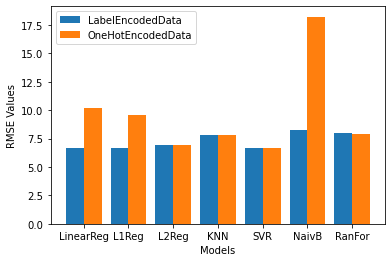

In [35]:
Cy1=np.array([rmse1a,rmse1b,rmse1c,rmse1d,rmse1e,rmse1f,rmse1g])
Cy2=np.array([rmse2a,rmse2b,rmse2c,rmse2d,rmse2e,rmse2f,rmse2g])

Cx=np.array(["LinearReg","L1Reg","L2Reg","KNN","SVR","NaivB","RanFor"])

x_axis=np.arange(len(Cx))

plt.bar(x_axis-0.2,Cy1,0.4,label='LabelEncodedData')
plt.bar(x_axis+0.2,Cy2,0.4,label='OneHotEncodedData')

plt.xticks(x_axis,Cx)
plt.ylabel("RMSE Values")
plt.xlabel("Models")

plt.legend()
plt.show()